In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dill as pickle
import os, sys
import scipy.interpolate as intp
import bead_util as bu
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
%matplotlib inline

from symmetric_attractor_profile import attractor_profile
from holes_analysis import holes_data, holes_analysis

In [28]:
parent = '/home/emmetth/gravity_sim'
os.chdir(parent)
full_path = parent+'/sim_data/modulated/'

PS = holes_data(data_dir=full_path)
data = PS.data

In [29]:
hrs = sorted(PS.hrs)
separations = sorted(PS.from_edges)

In [44]:
hrs

[5.0, 10.0, 12.5, 20.0, 25.0]

In [45]:
separations

[0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0]

In [46]:
p0 = 7,separations[-1],hrs[0],10.0,5.0
FM0 = holes_analysis(data, p0)

FM0.sum_harmonics(w=1, fsamp=5e3, num_harmonics=10, verbose=True)

First 10 harmonics:

           Radial     Angular     Axial
Newtonian: 7.072e-24  3.747e-24   1.585e-24
Yukawa:
l=1.00um: 1.638e-29  4.899e-31   7.566e-31
l=10.00um: 2.669e-24  6.018e-25   5.337e-25



array([[  7.07213090e-24,   3.74667673e-24,   1.58453488e-24],
       [  1.63816592e-29,   4.89914330e-31,   7.56605760e-31],
       [  2.66863977e-24,   6.01787907e-25,   5.33743580e-25]])

In [47]:
times, newt, (yuka, lambdas) = FM0.sample_Gdata(w=1, tint=1)

In [48]:
yuka.shape

(2, 3, 5000)

(0.0, 0.5)

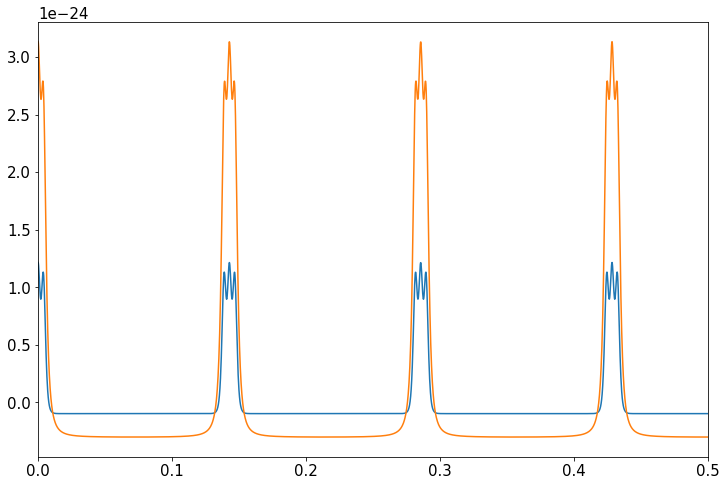

In [49]:
plt.plot(times, yuka[1,0,:]-np.mean(yuka[1,0,:]))
plt.plot(times, newt[0,:]-np.mean(newt[0,:]))
plt.rcParams['figure.figsize'] = 12,8
plt.xlim(0,0.5)

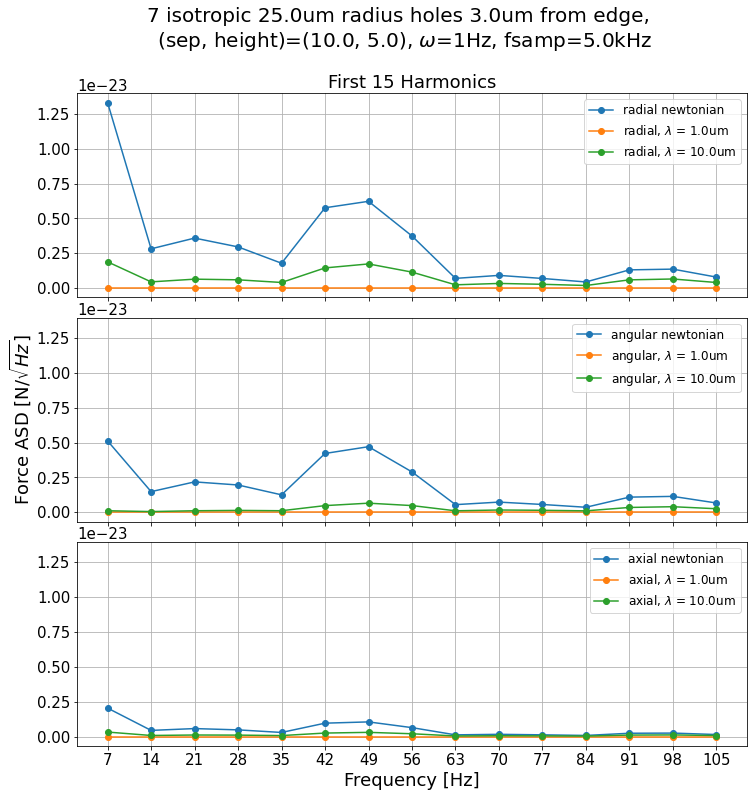

In [26]:
plt.close('all')
fig, ax = FM0.plot_signals(log=False, fsamp=5e3, f0=7, num_harmonics=15)
fig

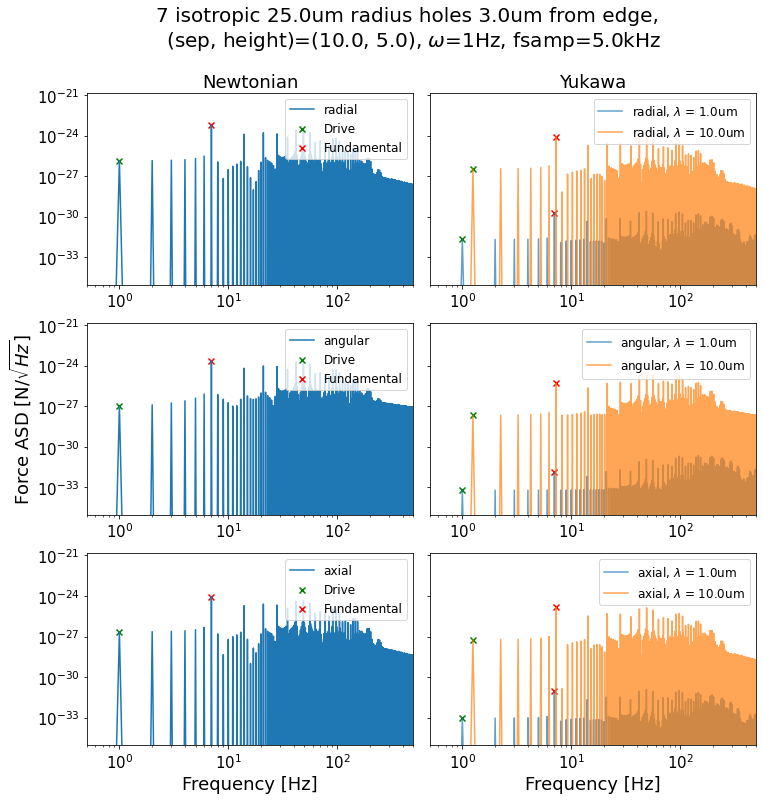

In [8]:
%matplotlib inline
fig,ax = FM0.plot_asd()

In [16]:
harms_rad = np.zeros((len(separations), len(hrs), 3))
sep, height = 5.0,5.0
axes_ind = {'radial': 0, 'angular': 1, 'axial': 2}

axis = axes_ind['radial']

for i,edge in enumerate(separations):
    for j,hr in enumerate(hrs):
        p = 7,edge,hr,sep,height
        FM = holes_analysis(data, p)
        harms = FM.sum_harmonics(w=1, fsamp=5e3, num_harmonics=10)
        harms_rad[i,j,:] = harms[:,axis]
        
np.save('holes_harm_rad_new.npy', harms_rad)

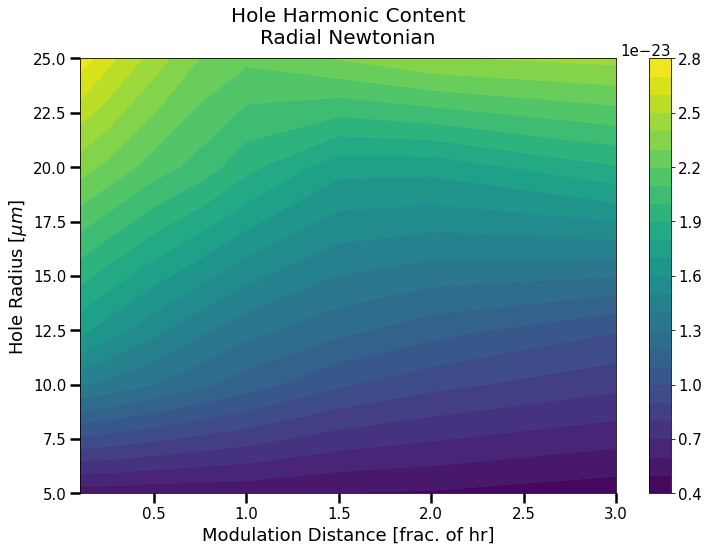

In [21]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
plt.contourf(separations, hrs, harms_rad[:,:,0].T, levels=25)
plt.colorbar()
plt.xlabel('Modulation Distance [frac. of hr]', fontsize=18)
plt.ylabel('Hole Radius [$\mu m$]', fontsize=18)
plt.title('Hole Harmonic Content\nRadial Newtonian', fontsize=20, y=1.02)
plt.tick_params('both', length=10, width=2.5, which='major', labelsize=15)
plt.tick_params('both', length=10, width=2.5, which='minor')
# plt.savefig('dist_radius.png', dpi=150)
plt.show()

This is not at all what I expected, but it makes sense as the absolute magnitude increases with both hole size and distance from edge, so to see the feature matching in a colorbar one would need to normalize the peaks to each other or something similar.

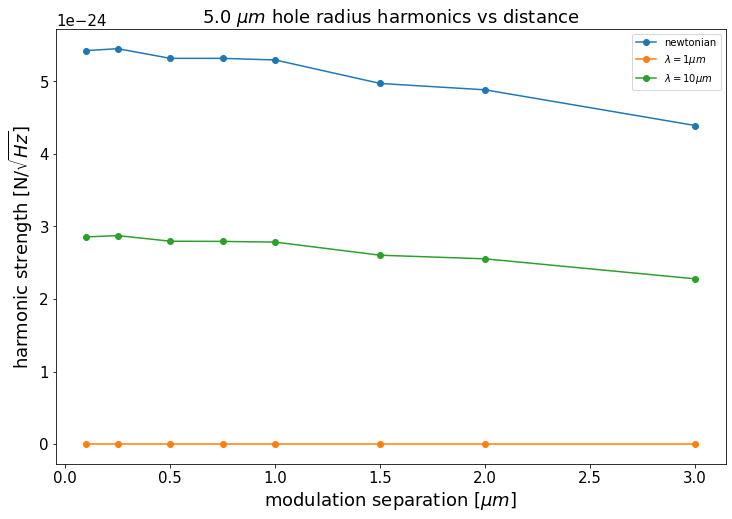

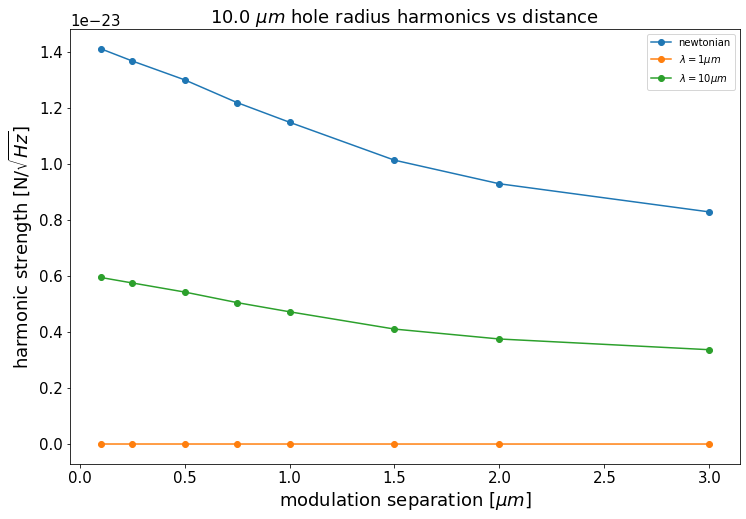

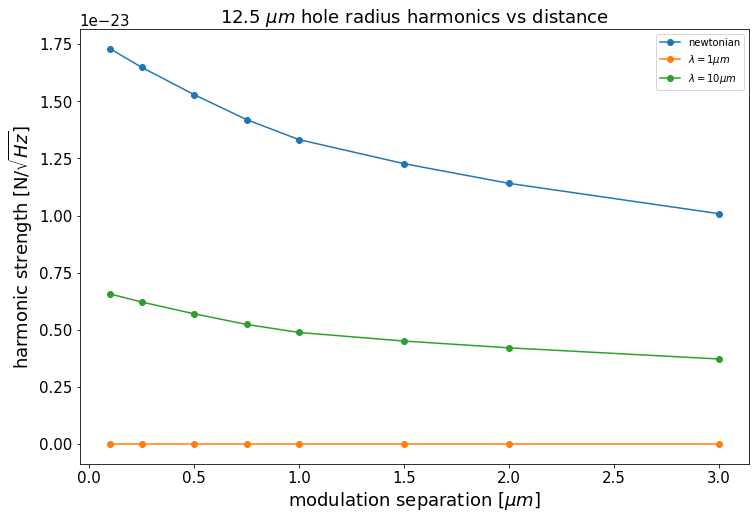

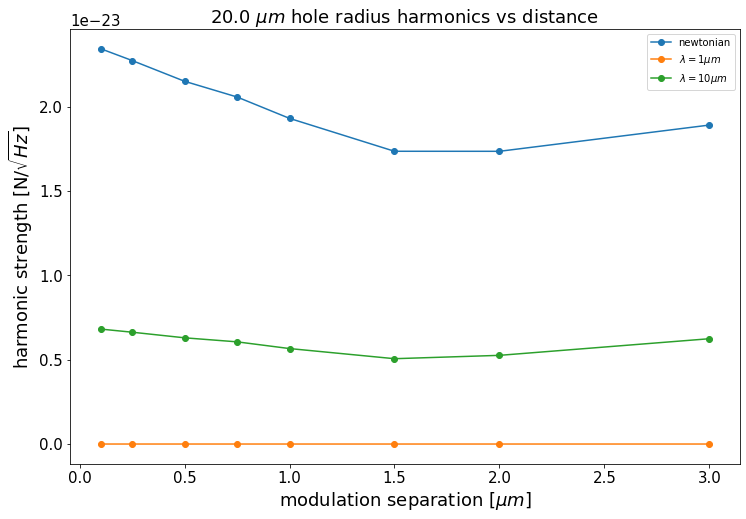

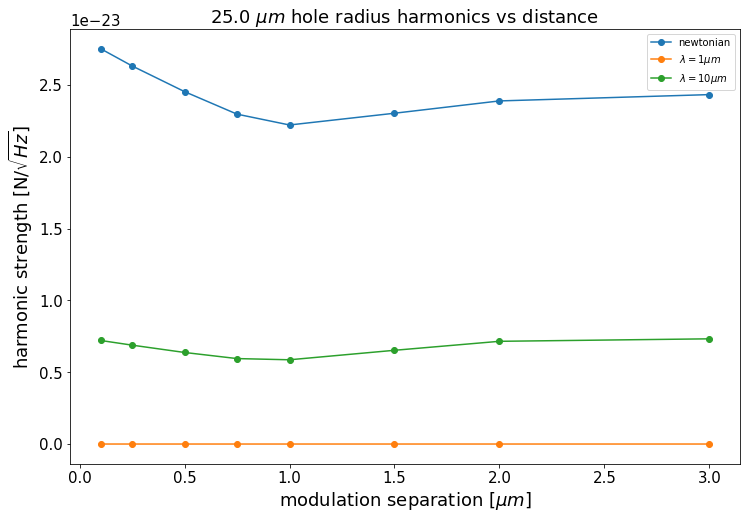

In [26]:
for i,hr in enumerate(hrs):
    plt.plot(separations, harms_rad[:,i,:], 'o-')
    plt.legend(['newtonian', '$\lambda=1\mu m$', '$\lambda=10\mu m$'])
    plt.xlabel('modulation separation [$\mu m$]', fontsize=18)
    plt.ylabel('harmonic strength [N/$\sqrt{Hz}$]', fontsize=18)
    # plt.axvline(hr, ls='--', alpha=0.7)
    plt.title(f'{hr} $\mu m$ hole radius harmonics vs distance', fontsize=18, y=1)
    # plt.savefig(f'new_feature_matching_plots/edge/{hr}.png', dpi=150)
    plt.show()

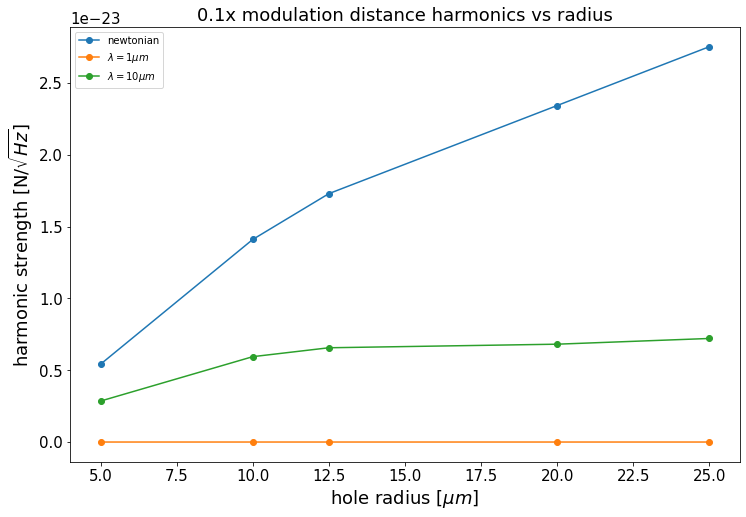

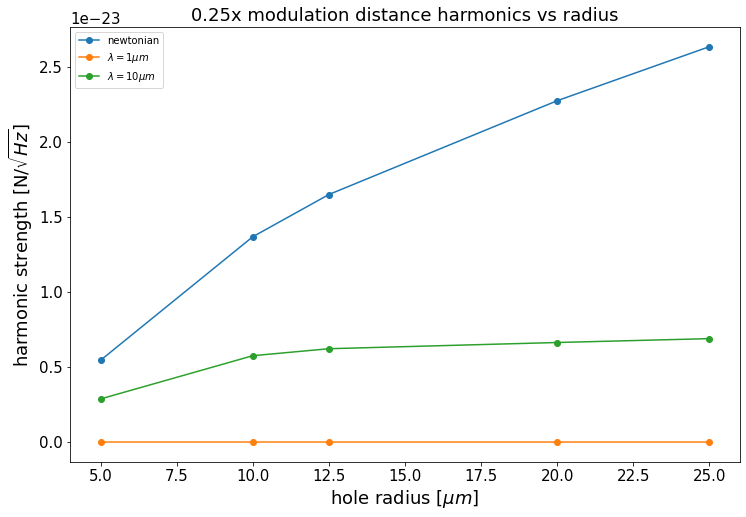

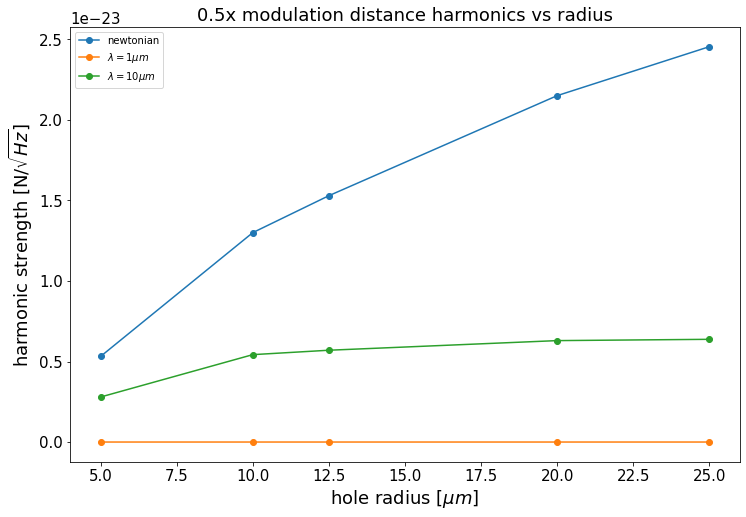

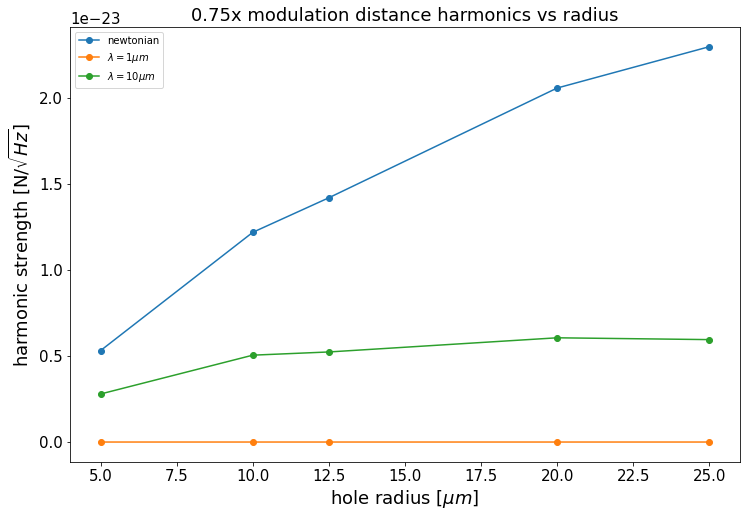

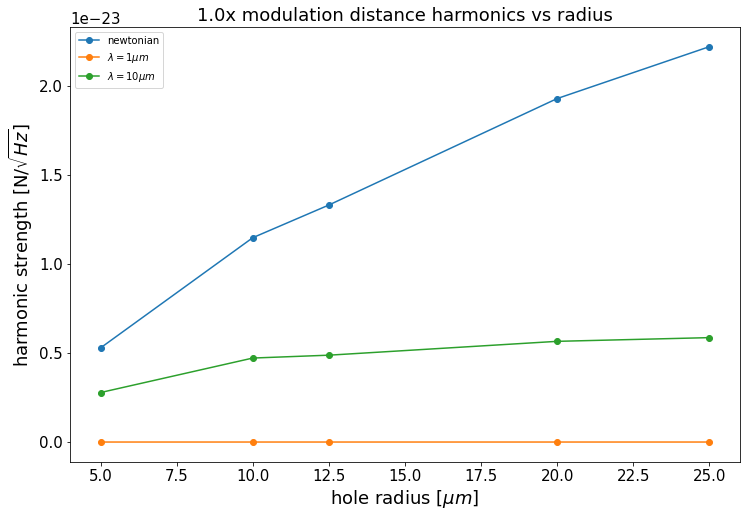

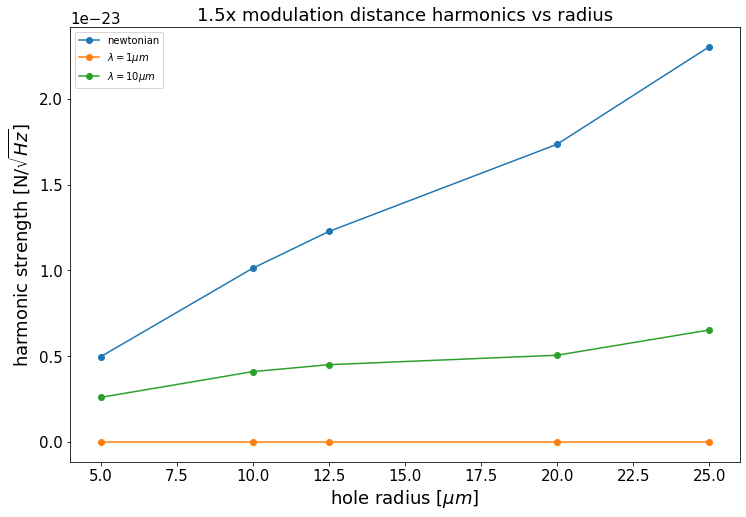

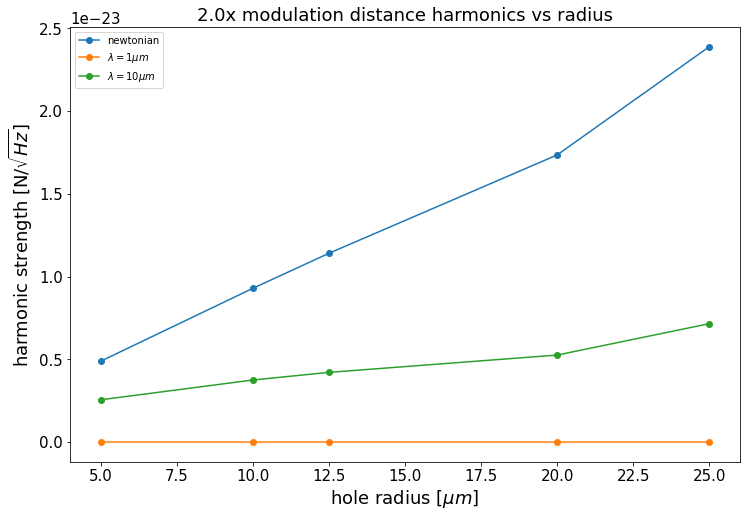

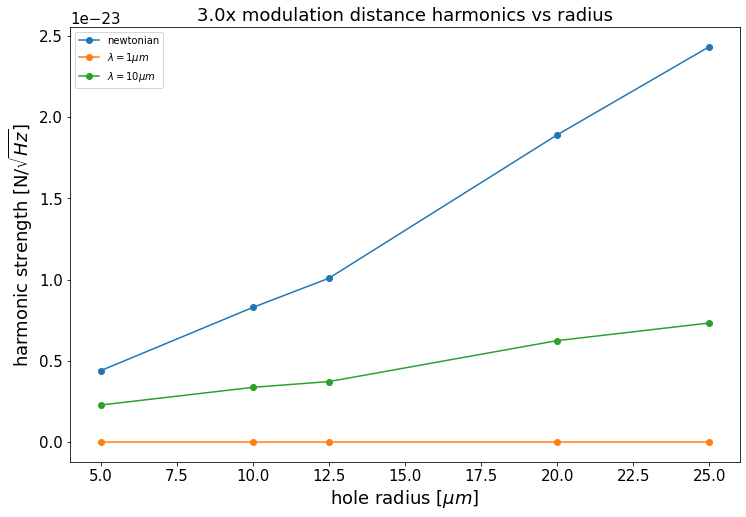

In [31]:
for i,edge in enumerate(separations):
    plt.plot(hrs, harms_rad[i,:,:], 'o-')
    plt.legend(['newtonian', '$\lambda=1\mu m$', '$\lambda=10\mu m$'])
    plt.xlabel('hole radius [$\mu m$]', fontsize=18)
    plt.ylabel('harmonic strength [N/$\sqrt{Hz}$]', fontsize=18)
    # plt.axvline(edge, ls='--', alpha=0.7)
    plt.title(f'{edge}x modulation distance harmonics vs radius', fontsize=18)
    # plt.savefig(f'new_feature_matching_plots/radius/{edge}.png', dpi=150)
    plt.show()